In [4]:
#import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict,RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from numpy import mean
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [5]:
#read the csv file
caravan = pd.read_csv("E:\\DSDM\\Data Mining\\Lab\\Lab 3 - Insurance Classification\\caravan.csv")
caravan_test = pd.read_csv("E:\\DSDM\\Data Mining\\Lab\\Lab 3 - Insurance Classification\\caravanTest.csv")

In [142]:
#to check the data in the dataframe
caravan.head()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,...,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN POLICY
0,33,1,3,2,8,...,0,0,0,0,0
1,37,1,2,2,8,...,0,0,0,0,0
2,37,1,2,2,8,...,0,0,0,0,0
3,9,1,3,3,3,...,0,0,0,0,0
4,40,1,4,2,10,...,0,0,0,0,0


In [121]:
print(caravan.shape,caravan_test.shape)

(5822, 86) (4000, 87)


In [9]:
#features and target obtained from the dataset
target = caravan.iloc[:,-1]
features = caravan.drop(['CARAVAN POLICY'],axis=1)

In [10]:
#There is class imbalance.Hence sampling may have to be used.
target.value_counts()

0    5474
1     348
Name: CARAVAN POLICY, dtype: int64

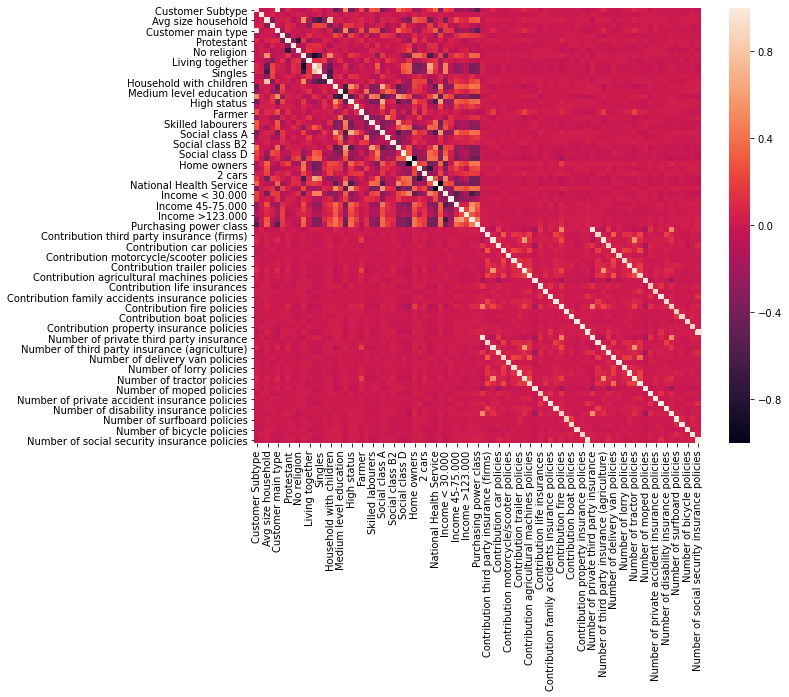

In [11]:
#correlation matrix. Most of the vraibles have close to zero correlation.
plt.subplots(figsize=(10,8))
sns.heatmap(features.corr());

In [143]:
#data exploration
features.describe()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,...,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,...,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,...,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,...,1.000000,2.000000,3.000000,2.000000,2.000000


In [13]:
#decision tree without sampling
tree = DecisionTreeClassifier(criterion='entropy')
cvp=cross_val_predict(tree,features,target, cv=10)
a=cross_val_score(tree,features,target, cv=10, scoring='recall')
b = confusion_matrix(target,cvp)
print(mean(a),'\n',b)

0.11470588235294119 
 [[5143  331]
 [ 303   45]]


In [123]:
#decision tree with sampling
steps = [('over', SMOTE()),('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, features, target, scoring='recall', cv=cv, n_jobs=-1)
score = mean(scores)
print('recall: %.3f' % score)

recall: 0.151


When there is class imbalance, recall is a good indicator of model performance.
Since recall is very low, the decision tree model performance is poor for SMOTE sampling and non-sampled data.

Text(0, 0.5, 'Recall')

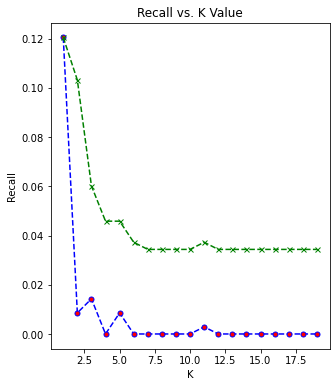

In [125]:
##knn without sampling
recall=[]
recallw=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knnw = KNeighborsClassifier(n_neighbors=i,weights= 'distance')
    cvp=cross_val_predict(knn,features.values,target.values, cv=5)
    a=cross_val_score(knn,features.values,target.values, cv=5, scoring='recall')
    cvpw=cross_val_predict(knnw,features.values,target.values, cv=5)
    aw=cross_val_score(knnw,features.values,target.values, cv=5, scoring='recall')
    recall.append(np.mean(a))
    recallw.append(np.mean(aw))
    
plt.figure(figsize=(5,6))
plt.plot(range(1,20),recall,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.plot(range(1,20),recallw,color='green', linestyle='dashed', 
        marker='x',markerfacecolor='yellow', markersize=5)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')

Knn-neighbours performance without sampling is poor. This is evident from the plot above. When grid search for unweighted and weighted Knn for k from 1 to 20 was done, the recall values were found to be very dismal.

Text(0, 0.5, 'Recall')

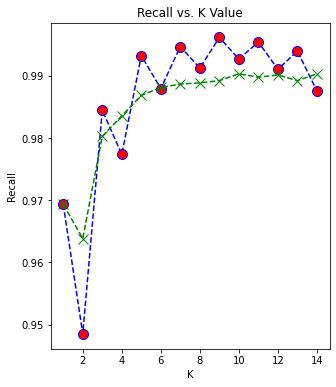

In [126]:
##knn with sampling
oversample = SMOTE()

features_over,target_over = oversample.fit_resample(features,target)


recall=[]
recallw=[]
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knnw = KNeighborsClassifier(n_neighbors=i,weights= 'distance')
    cvp=cross_val_predict(knn,features_over.values,target_over.values, cv=3)
    a=cross_val_score(knn,features_over.values,target_over.values, cv=3, scoring='recall')
    cvpw=cross_val_predict(knnw,features_over.values,target_over.values, cv=3)
    aw=cross_val_score(knnw,features_over.values,target_over.values, cv=3, scoring='recall')
    
    recall.append(np.mean(a))
    recallw.append(np.mean(aw))
    
plt.figure(figsize=(5,6))
plt.plot(range(1,15),recall,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.plot(range(1,15),recallw,color='green', linestyle='dashed', 
        marker='x',markerfacecolor='yellow', markersize=10)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')

In [129]:
knn = KNeighborsClassifier(n_neighbors=9)
knnw = KNeighborsClassifier(n_neighbors=9,weights= 'distance')
cvp=cross_val_predict(knn,features_over.values,target_over.values, cv=3)
a=cross_val_score(knn,features_over.values,target_over.values, cv=3, scoring='recall')
cvpw=cross_val_predict(knnw,features_over.values,target_over.values, cv=3)
aw=cross_val_score(knnw,features_over.values,target_over.values, cv=3, scoring='recall')
b=confusion_matrix(target_over,cvp)
bw=confusion_matrix(target_over,cvpw)
print("Unweighted CF",b)
print("Weighted CF",bw)

Unweighted CF [[3820 1654]
 [  21 5453]]
Weighted CF [[4214 1260]
 [  59 5415]]


Weighted Knn-neighbours with SMOTE sampling recall value increases as k value increases through the grid search method. This is evident from the plot above. But when confusion matrix for k=9 is checked, it has high number of false positives. 

In [17]:
#naive bayes with sampling
gauss = GaussianNB()
cvp=cross_val_predict(gauss,features_over,target_over, cv=10)
a=cross_val_score(gauss,features_over,target_over, cv=10, scoring='accuracy')
c=cross_val_score(gauss,features_over,target_over, cv=10, scoring='recall')
b = confusion_matrix(target_over,cvp)
print('acc:',mean(a),'rec:',mean(c),'\n',b)

acc: 0.5907936189927625 rec: 0.963821241276238 
 [[1192 4282]
 [ 198 5276]]


Naive Bayes classifier with SMOTE sampling has a good recall but bad accuracy.

In [132]:
#svm with sampling
svm = SVC()
cvp=cross_val_predict(svm,features_over,target_over, cv=5)
b=cross_val_score(svm,features_over,target_over, cv=5, scoring='recall')
a=cross_val_score(gauss,features_over,target_over, cv=10, scoring='accuracy')
c = confusion_matrix(target_over,cvp)
print("acc:",mean(a),'\n',c,'\nrec:',mean(b))

acc: 0.588601170352191 
 [[5342  132]
 [ 750 4724]] 
rec: 0.8629983388010987


SVM with SMOTE sampling has low accuracy and good recall.

In [19]:
#for feature selection
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [20]:
from sklearn.model_selection import cross_validate
#logit with sampling
logit = LogisticRegression(solver='lbfgs',max_iter=10000)
cvp=cross_val_predict(logit,features_over,target_over, cv=10)
a=cross_val_score(logit,features_over,target_over, cv=10, scoring='accuracy')
c=cross_val_score(logit,features_over,target_over, cv=10, scoring='recall')
b = confusion_matrix(target_over,cvp)
print('acc:',mean(a),'rec:',mean(c),'\n',b)

acc: 0.9233704807459533 rec: 0.8848700276224664 
 [[5265  209]
 [ 630 4844]]


Logistic Regression with SMOTE sampling has good accuracy and good recall. Hence it is considered further for feature selection and prediction.


In [21]:
#feature selection using chi2 method
logit_20 = sklearn.feature_selection.chi2(features_over,target_over)

In [22]:
 fi =pd.DataFrame(data=logit_20[0], index= range(85),columns=['val'])

In [23]:
best_feature_index=fi.sort_values(by=['val'],ascending=False).head(10)

E:\Jupyter\lib\site-packages\pandas\core\indexes\base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


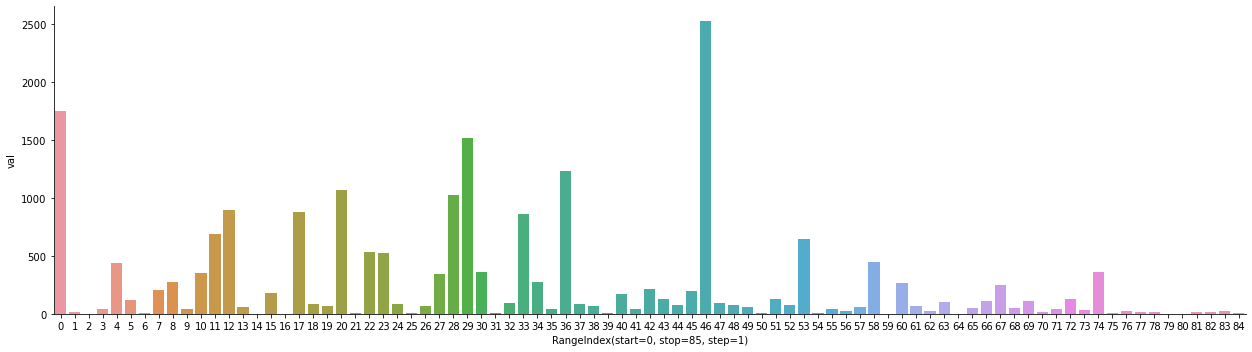

In [24]:
sns.catplot(x=fi.index,y='val',data=fi,kind='bar',aspect=3.5)
    

Feature importance plot. Top 10 important features are chosen to describe a customer.

In [25]:
best_feat10 = caravan.iloc[:,best_feature_index.index]

In [26]:
best_feature_index

,val
46,2523.148717
0,1748.858241
29,1517.544008
36,1230.196873
20,1070.143228
28,1022.510791
12,894.151045
17,878.897810
33,857.467133
11,691.054843


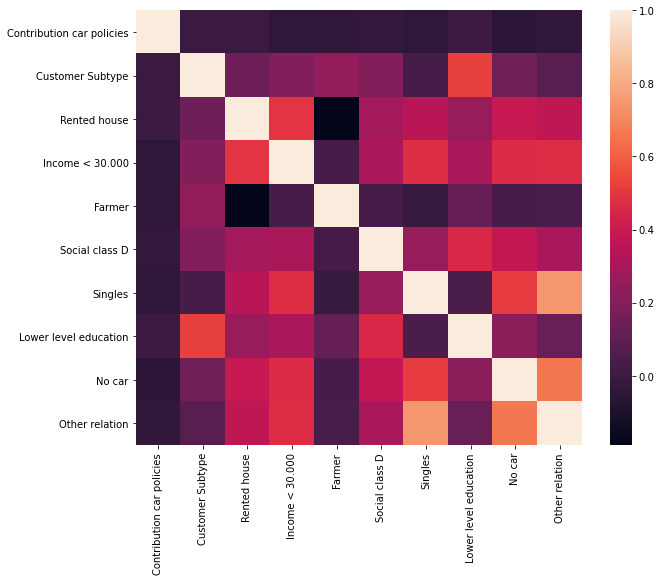

In [27]:
plt.subplots(figsize=(10,8))
sns.heatmap(best_feat10.corr());

In [28]:
best_feat10 = pd.concat([best_feat10, target],axis=1)

In [30]:
pot_cust_feat = pd.DataFrame(columns=['type','count0','count1','feature'])
for i in best_feat10.columns:
    aa=best_feat10[i].loc[best_feat10['CARAVAN POLICY']==1].value_counts().reset_index()
    ab = best_feat10[i].loc[best_feat10['CARAVAN POLICY']==0].value_counts().reset_index()
    ac = pd.merge(ab,aa,on='index',how='outer')
    ac['feature']=i
    ac.columns=['type','count0','count1','feature']
    pot_cust_feat=pot_cust_feat.append(ac)
pot_cust_feat=pot_cust_feat.fillna(0)
pot_cust_feat['perc']=(100*pot_cust_feat['count1'])/(pot_cust_feat['count1'] +pot_cust_feat['count0'])

In [137]:
pot_cust_feat.columns=['feature_type','not_bought_pol','bought_pol','feature','%bought_policy']
columns_titles = ['feature','feature_type','not_bought_pol','bought_pol','%bought_policy']
pot_cust_feat=pot_cust_feat.reindex(columns=columns_titles)
pot_cust_feat.sort_values(['%bought_policy'],ascending=False).iloc[1:11 , :]


,feature,feature_type,not_bought_pol,bought_pol,%bought_policy
3,Customer Subtype,8,288.0,51.0,15.044248
21,Customer Subtype,12,95.0,16.0,14.414414
1,Contribution car policies,6,2057.0,262.0,11.297973
9,Lower level education,1,216.0,27.0,11.111111
19,Customer Subtype,1,111.0,13.0,10.483871
20,Customer Subtype,6,107.0,12.0,10.084034
6,Customer Subtype,3,224.0,25.0,10.040161
0,Rented house,0,855.0,94.0,9.905163
5,Lower level education,2,602.0,65.0,9.745127
7,Lower level education,0,270.0,29.0,9.698997


2.2 Assigment 1

Feature selection gave us the set of features which are useful to predict the policy buyers.
These features were used to predict potential customers and to find their distinct qualities.
From the above table it can be seen that customers with:
1. 'Customer Subtype'=8,12,1,6,3
2. 'Contribution car policies' = 6
3. 'Lower level education' = 1,2,0
4. 'Rented house' = 0,1
5. 'Income < 30.000' =1,2

have bought higher proportion of policies than customers with other qualities.
Hence targetting these kind of customers may lead to more policies being bought.                    


In [32]:
target_t = caravan_test.iloc[:,-1]
features_t =caravan_test.drop(['CARAVAN POLICY'],axis=1)

In [37]:
logit = LogisticRegression(solver='lbfgs',max_iter=10000)
logit.fit(features_over,target_over)
pred = logit.predict_proba(features_t)

Use logistic regression to predict the potential customer from caravan_test

In [48]:
#store class 1 value in list
pred1=[]
for i in range(len(pred)):
    pred1.append(pred[i][1])

In [49]:
caravan_test['prediction']=pred1

In [113]:
potential800=caravan_test.sort_values(by=['prediction'],ascending=False).head(800)

In [119]:
recall_score(target_t,caravan_test['prediction']>0.13)

0.5042016806722689

In [120]:
accuracy_score(target_t,caravan_test['prediction']>0.13)

0.70425

In [114]:
#list of potential customers
print(*potential800.index)

291 3499 2297 686 2502 2621 1781 1724 1995 3418 3354 3426 577 2587 2230 83 1271 1281 2154 3012 2149 278 1182 209 3442 706 2118 2067 3015 1856 1169 340 2951 1512 2985 102 2864 2944 862 2416 2112 1738 2559 3317 3028 3459 1969 2017 1144 3336 684 1467 3812 1383 165 2843 1242 2194 2442 1367 1298 1153 575 2135 846 2394 2581 1689 3018 1561 3147 182 3345 789 772 2929 570 810 132 3389 1786 3303 1970 3712 699 3168 112 3082 2628 43 2302 1259 1634 310 26 243 2216 1548 3280 640 268 281 3838 2893 3347 3387 501 3503 3198 774 453 1498 1821 1895 1435 229 761 1246 2070 2391 313 1374 2411 1252 2091 3511 2798 2510 1508 3615 2515 2240 2981 3060 1028 2379 1115 2139 3148 2184 2713 2193 1223 2877 1792 1239 2252 1690 2591 3046 2895 847 1879 914 833 2009 3716 198 2625 651 844 2545 3346 150 601 3152 944 2748 3894 631 875 3230 3725 179 3092 100 3220 2132 2403 749 1466 2521 3703 3974 3876 927 1825 3108 3842 3518 3226 3889 1015 1905 3986 2048 1804 1763 3359 1333 2577 803 515 338 448 2041 3604 3606 947 1137 1268 328